In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
# 1. Loading the dataset

In [4]:
mydata = pd.read_csv('homework3_input_data.csv')
X = mydata.iloc[:, :8].values
Y = mydata.iloc[:, 8:].values

In [5]:
X.shape, Y.shape

((1030, 8), (1030, 1))

In [6]:
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [7]:
Y

array([[79.99],
       [61.89],
       [40.27],
       ...,
       [23.7 ],
       [32.77],
       [32.4 ]])

In [8]:
mydata

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
mydata.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
#2. Plotting all independent variables vs. the dependent variable

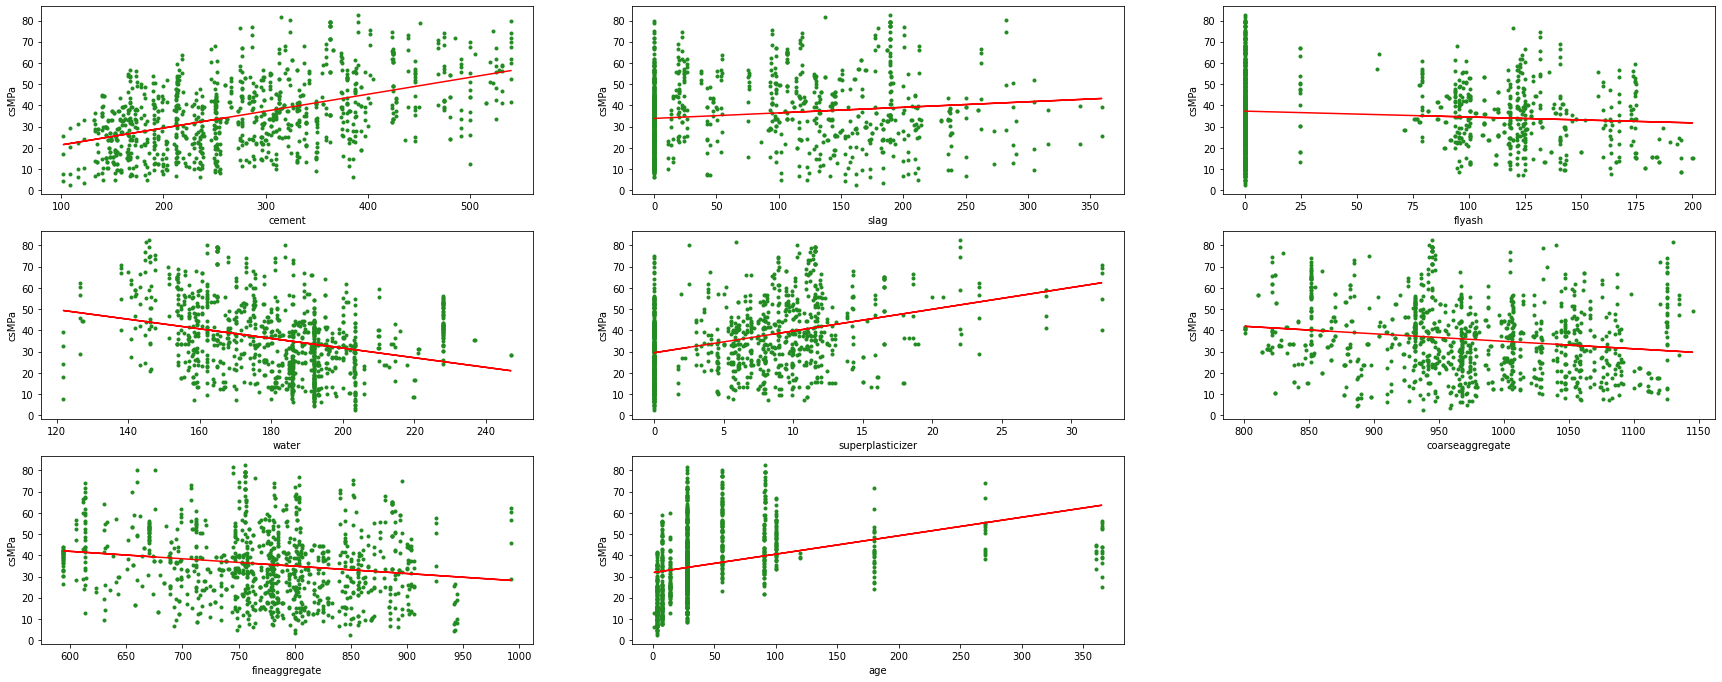

In [11]:
plt.figure(figsize=(30,20))
for i, col in enumerate(mydata.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = mydata[col]
    y = mydata['csMPa']
    plt.plot(x, y, '.', color="forestgreen")
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color="red")
    plt.xlabel(col)
    plt.ylabel('csMPa')

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:967: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:1015: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probability Density')

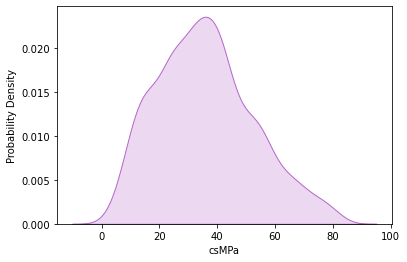

In [12]:
sns.kdeplot(mydata['csMPa'], color='#b667c9', shade=True, Label='Concrete Quality')
plt.xlabel('csMPa') 
plt.ylabel('Probability Density') 

In [13]:
#3. Computing and plotting a correlation matrix between the independent variables

<AxesSubplot:>

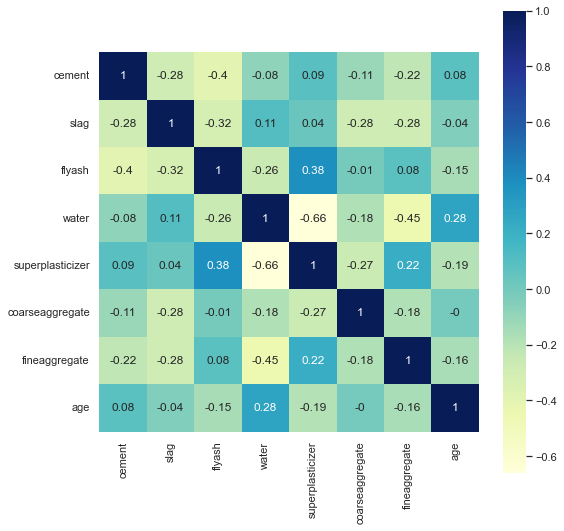

In [14]:
features = mydata[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [15]:
#4. Breaking the data into the training and test datasets.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824, 1), (206, 8), (206, 1))

In [17]:
#5. Training a linear regression model to predict the dependent variable based on the input variables.

In [18]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

In [19]:
#6. Mean squared error and coefficient of determination.

In [20]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [[ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
   0.02248514  0.11520355]]
Mean squared error: 95.62
Coefficient of determination: 0.64


In [21]:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test, Y_test_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

Mean squared error: 95.62
Mean absolute error: 7.86
Root mean squared error: 9.78


In [22]:
#7. Plotting the predicted vs. actual csMPa values

Text(0, 0.5, 'Predicted Y')

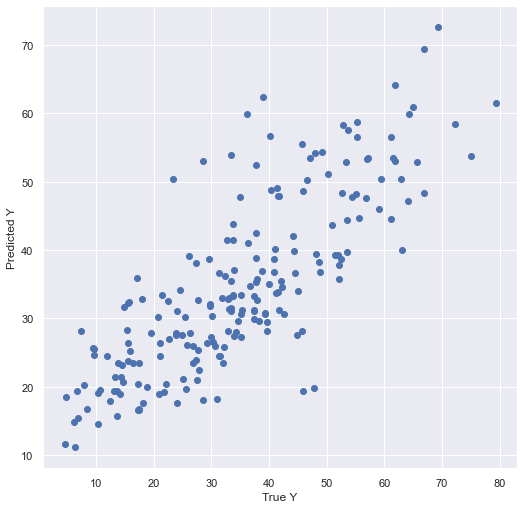

In [23]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')